<a href="https://colab.research.google.com/github/PlayMaker97/Covid-19-Dashborad/blob/main/Copy_of_Matious_Internship_ML_%3CMohamed_Chatei%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Introduction`

In this notebook, you should implement Google Cloud Speech library to transcribe an audio file, and to show the word cloud chart associated to the transcription.

**IMPORTANT NOTE** : You should create a copy of this notebook in your Colab account, and share your final work with the following address : ysf.bsf@gmail.com as "Editor"

# Notebook Code


1- Install Google Cloud Speech


In [ ]:

#install google cloud library 
!pip install --upgrade google-cloud-speech

#since thr python version is 3.6.9 i need to modify my dependencies
!pip install google-api-core==1.16.0 
!pip install google-cloud-speech==1.3.2








2- Transcribe the following audio file using Google Speech-to-text library : https://fr.matious.com/data/sample1.wav


**Note :** If you are not able to create an account in Google Cloud, you can use this API credential file : https://drive.google.com/file/d/1iXJshjpo6sziZ39yD9JqCAo37brRX4Pz/view?usp=sharing



In [1]:
# Write the transcription script here




# Imports the Google Cloud client library and OS 
import os
import io

from google.cloud import speech


#give the credentials to my envirement in order to allow the API to work by giving it the necessary permitions
cridentials = r"/content/speech-6939b230dafc.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = cridentials

# Instantiates a client
client = speech.SpeechClient()





with io.open('/content/sample1.wav', "rb") as audio_file:
        content = audio_file.read()








config = {
    "language_code": "fr-FR",
    
   "encoding": "LINEAR16",

    
}

#getting the audio file
audio = {"content": content}




# Detects speech in the audio file
response = client.recognize(config=config,audio=audio )

for result in response.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))










Transcript: utiliser la vidéo pour communiquer c'est s'assurer une visibilité en choisissant le média le plus important et le plus populaire utilisé la vidéo pour communiquer c'est s'assurer une visibilité en choisissant le média le plus important et le plus populaire
Transcript:  une entreprise a besoin de communiquer pour présenter son activité et les avantages de son offre utiliser la vidéo pour communiquer ce assurer une visibilité en choisissant le média le plus important est le plus fort mais nous apporte aux entreprises une communication vidéo professionnelle créative et adapté à leur budget à Porto entreprise une communication vidéo professionnelle créative et adapté à leur budget aux entreprises une communication vidéo professionnelle adaptée


3- Show a word cloud chart based on the occurence frequency of the words that compose the transcribed audio. Example : http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530034171/Aromas_bfy0ec.png 


  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32919 sha256=632ff56d61c768470fc19c61ade95a244f68db534d496acd344d0da1e85669d7
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


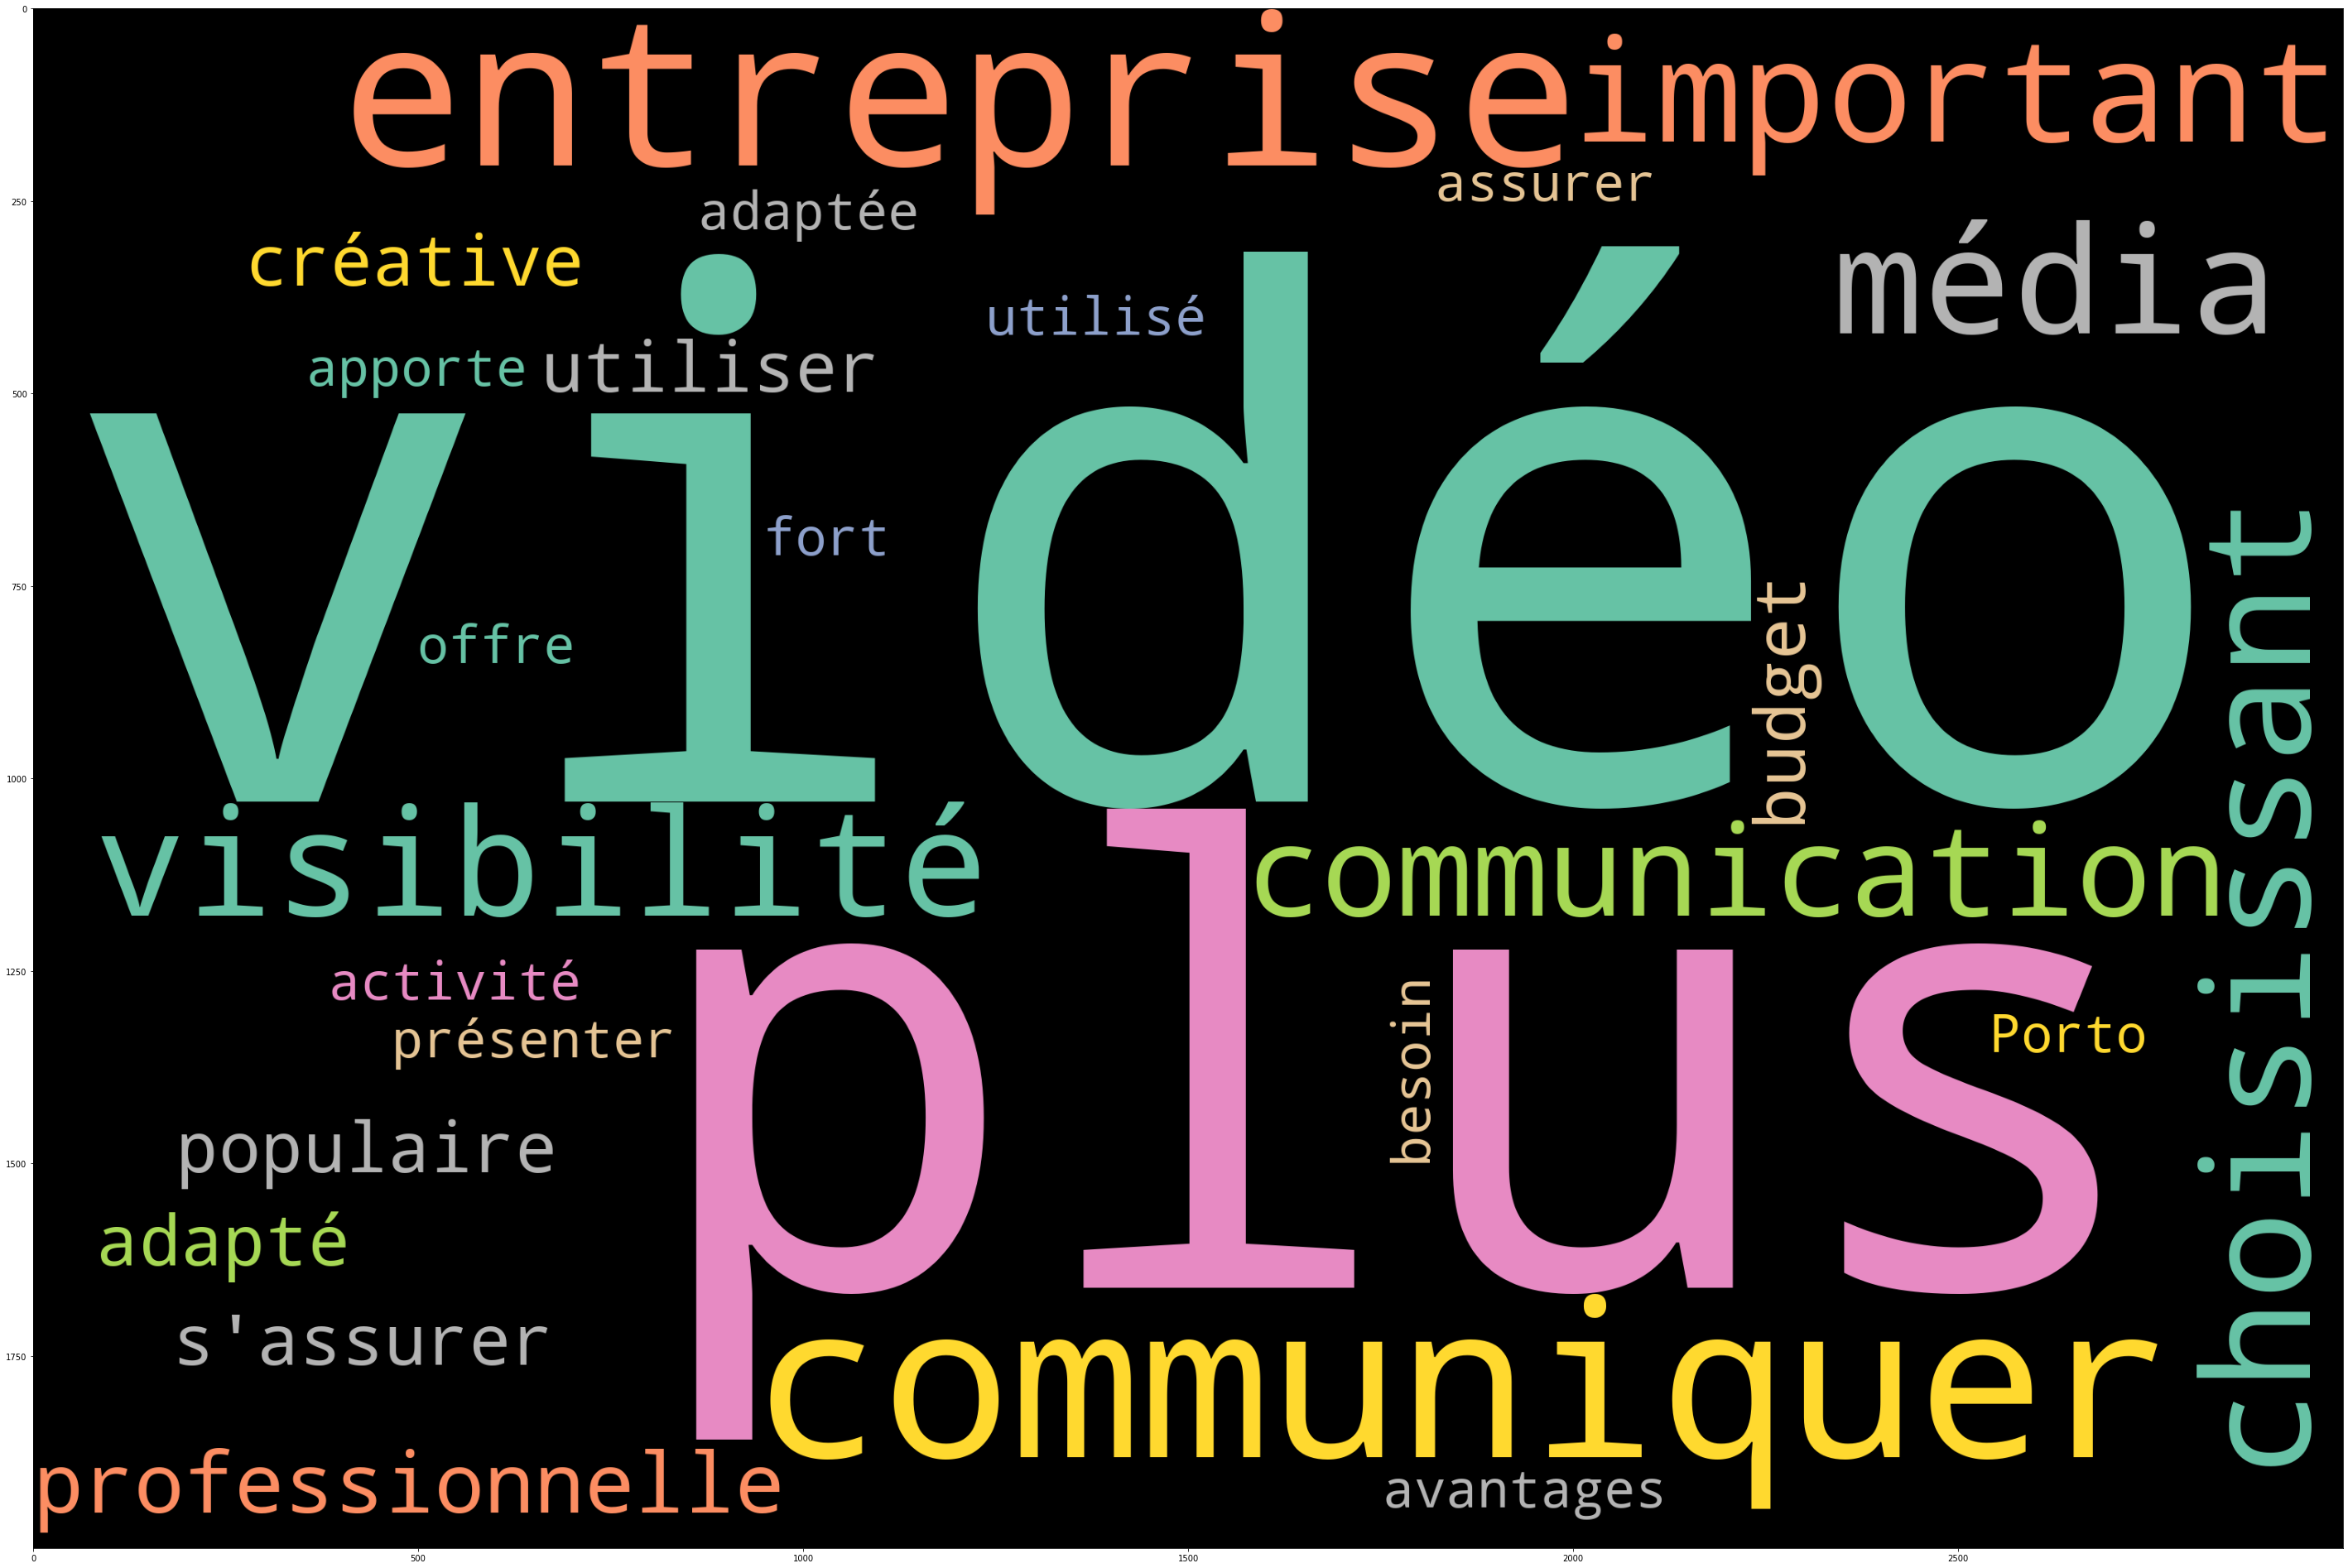

In [2]:
# Put your code here
!pip install wordcloud
!pip install stop-words



from wordcloud import WordCloud,  ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from stop_words import get_stop_words

#get frensh stop words 
stop_words = get_stop_words('fr')

#adding custom stopwords to exclude
stop_words.append("c'est")



#text to generate wordcloud from
text =''

#fill the text with words from the previous results
for result in response.results:
      text = text + result.alternatives[0].transcript



wordcloud = wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stop_words).generate(text)

# Generate wordcloud
plt.figure(figsize=(50, 40))
plt.imshow(wordcloud) 

